## Task 1

reading files using pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Covid-19.csv")


In [3]:
dataset.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [4]:
dataset.shape

(187, 15)

In [5]:
dataset.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


#### clustering
now we making dataset for different type of clustering 
first is K-Mean Clustering
Second id Agglomerative Clustering

###### removing null

In [6]:
#elemenating null values if any.
covid19_df_kill_null = dataset[["Confirmed","Deaths"]].dropna()


##### detecting and removing outliers

In [7]:
def DetectOutlier(Mydata):
    q_1 = np.percentile(Mydata, 25)
    q_3 = np.percentile(Mydata, 75)
    lst = list()
    iQr = q_3 - q_1
    lwrLimit = q_1-(1.5*iQr)
    uprLimit = q_3+(1.5*iQr)
    
    for i in Mydata:
        if(i<lwrLimit or i>uprLimit):
            lst.append(i)
            
    return lst
Cinfirmed_outliers = DetectOutlier(covid19_df_kill_null["Confirmed"])
Death_outliers = DetectOutlier(covid19_df_kill_null["Deaths"])


In [8]:
for i in Cinfirmed_outliers:
    calcConfirm = np.delete(Cinfirmed_outliers, np.where(Cinfirmed_outliers==i))


for j in Death_outliers:
    calcDeath = np.delete(Death_outliers, np.where(Death_outliers==j))
    

In [10]:
#normalization
from sklearn import preprocessing

normalized = preprocessing.normalize(NewDf)

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [12]:
slr = StandardScaler()

In [13]:
df_slr = pd.DataFrame(slr.fit_transform(NewDf), columns=NewDf.columns)

In [14]:
pca = PCA()
pca_df = pd.DataFrame(pca.fit_transform(df_slr))


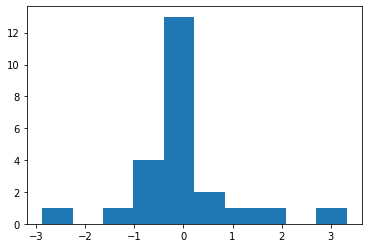

In [15]:
plt.hist(pca_df[0])
plt.show()

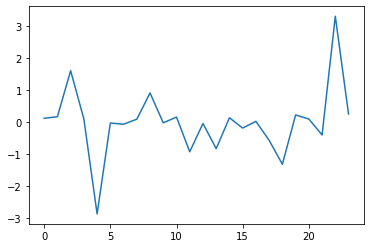

In [16]:
plt.plot(pca_df[0])
plt.show()

 #### method 01: elbow curve method to find number of cluster

In [17]:
##### finding numbers of clusters
# elbow method
X = pca_df.values
from sklearn.cluster import KMeans
optimalPoints = []
for i in range(1,14):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(X)
    optimalPoints.append(kmeans.inertia_)

E:\Files\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


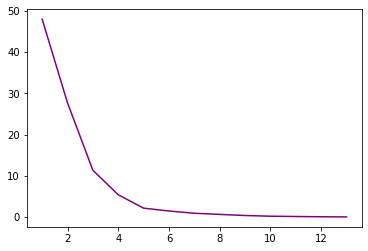

In [18]:
plt.plot(range(1,14),optimalPoints, color = "purple")
plt.show()

##### method 2: silhouette_score method 

In [109]:
# The Silhouette Method
import sklearn.metrics as metrics
for i in range(2,14):
    label = KMeans(n_clusters =i, init="k-means++", random_state=200).fit(X).labels_
    print(i,str(metrics.silhouette_score(X,label,metric="euclidean",sample_size=100, random_state=200)))

2 0.6607589384481439
3 0.6390160783485103
4 0.6318279517568612
5 0.6517356778952846
6 0.5322962305270529
7 0.5026089386941172
8 0.46795050118222026
9 0.4727670122658519
10 0.31979968881533605
11 0.3399295434297238
12 0.3081304333380194
13 0.3060788102319923


highest values is on 5th number it means that on both method we predict total number of clusters are 5

### K Means Clustering

In [19]:
km = KMeans(n_clusters = 5, init = "k-means++")
y_km = km.fit_predict(X)

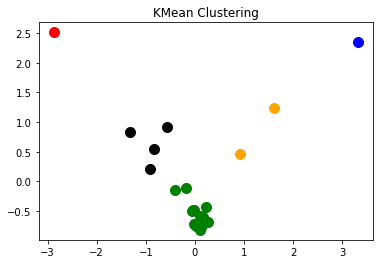

In [105]:
def kmeanCluster():
    plt.title("KMean Clustering")
    plt.scatter(X[y_km==0,0], X[y_km==0,1], s=100, c="red")
    plt.scatter(X[y_km==1,0], X[y_km==1,1], s=100, c="green")
    plt.scatter(X[y_km==2,0], X[y_km==2,1], s=100, c="blue")
    plt.scatter(X[y_km==3,0], X[y_km==3,1], s=100, c="black")
    plt.scatter(X[y_km==4,0], X[y_km==4,1], s=100, c="orange")
    plt.show()
kmeanCluster()

In [21]:
pca_df["cluster"] = y_km

In [22]:
pca_df

,0,1,cluster
0,0.123082,-0.760972,1
1,0.171591,-0.719434,1
2,1.613984,1.231475,4
3,0.099346,-0.815262,1
4,-2.874178,2.512675,0
5,-0.026473,-0.474094,1
6,-0.063618,-0.493218,1
7,0.094256,-0.671364,1
8,0.916008,0.456002,4
9,-0.019998,-0.720654,1


In [25]:
import scipy.cluster.hierarchy as obj
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")

In [26]:
y_ac = ac.fit_predict(X)

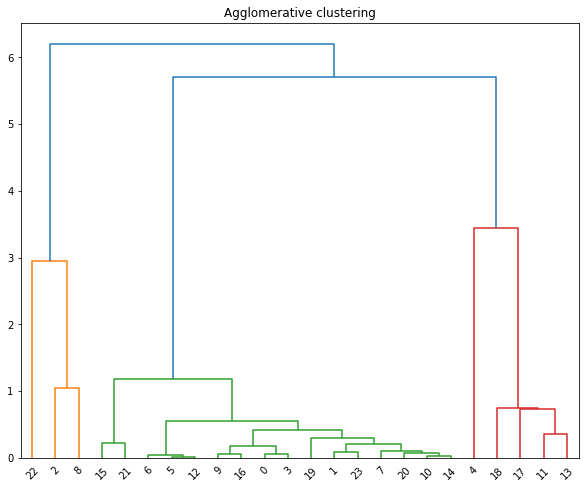

In [107]:
def dendogram():
    plt.figure(figsize=(10,8))
    plt.title("Agglomerative clustering")
    dendrogram = obj.dendrogram(obj.linkage(X, method="ward"))
dendogram()

## Task 2

In [90]:
# reading dataset
data = pd.read_csv("lastfm.csv")

# corrrelation
data.corr()



,user
user,1.0


In [92]:
data.head()

,user,artist,sex,country
0,1,red hot chili peppers,f,Germany
1,1,the black dahlia murder,f,Germany
2,1,goldfrapp,f,Germany
3,1,dropkick murphys,f,Germany
4,1,le tigre,f,Germany


In [93]:
data.describe()

,user
count,289955.000000
mean,9852.460447
std,5692.355041
min,1.000000
25%,4935.000000
50%,9838.000000
75%,14769.000000
max,19718.000000


In [97]:
data.dtypes

user        int64
artist     object
sex        object
country    object
dtype: object

In [91]:
data.country.unique()
corr = data.corr()


cleaning dataset

In [33]:
data['artist'] = data['artist'].str.strip()
data.dropna()

,user,artist,sex,country
0,1,red hot chili peppers,f,Germany
1,1,the black dahlia murder,f,Germany
2,1,goldfrapp,f,Germany
3,1,dropkick murphys,f,Germany
4,1,le tigre,f,Germany
...,...,...,...,...
289950,19718,bob dylan,f,Canada
289951,19718,pixies,f,Canada
289952,19718,the clash,f,Canada
289953,19718,a tribe called quest,f,Canada


In [100]:
basket_Germany =  (data[data['country'] =="Germany"]
                   .groupby(['user', 'artist'])['sex']
                  .sum().unstack().reset_index().fillna(0)
                  .set_index('user'))
basket_Canada =  (data[data['country'] =="Canada"]
                 .groupby(['user', 'artist'])['sex']
                  .sum().unstack().reset_index().fillna(0)
                  .set_index('user'))

basket_UK =  (data[data['country'] =="United Kingdom"]
                 .groupby(['user', 'artist'])['sex']
                  .sum().unstack().reset_index().fillna(0)
                  .set_index('user'))



In [101]:
from apyori import apriori
rule = apriori(transactions = basket_Germany, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)
rule1 = apriori(transactions = basket_Canada, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)
rule2 = apriori(transactions = basket_UK, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)


In [103]:
def insp(x):
    left         = [tuple(rule[2][0][0])[0] for rule in x]
    right        = [tuple(rule[2][0][1])[0] for rule in x]
    support    = [rule[1] for rule in x]
    conf = [rule[2][0][2] for rule in x]
    lft       = [rule[2][0][3] for rule in x]
    return list(zip(left, right, support, conf, lft))
out_df = pd.DataFrame(insp(out), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
out_df1 = pd.DataFrame(insp(out1), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
out_df2 = pd.DataFrame(insp(out2), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])

out_df

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
0,!,g,0.003003,0.600,3.222581
1,!,p,0.003003,0.600,3.171429
2,&,w,0.003003,0.375,3.985372
3,6,y,0.003003,1.000,4.826087
4,ö,k,0.003003,0.600,3.654878
5,q,u,0.011011,1.000,4.420354


### 3 
 Critically summarise the business value of each basket analysis with reference 
to the given domain 

##### Discuss the meaning of the important rules for each basket;
we have three basekts different for three countries like germany canda and united kingdom.
first step is to make group or to sepearte according to rule of groupby
importing the library apyori and make object of it.
now make builtin function inspect and inspect all the datasets. 
after that we making new dataset and print it as above output.

###### Justify your findings using the results of tasks 1 and 2.
in the task 1 we making the clusters and find different type of clusters one is kmeand cluster
another is agglomerative clustering. all the grouping is according to covid 19 data in kmean clustering the dataset is based on confirmed cases and death cases. 
outputs are shown below:


##### k-mean clustering

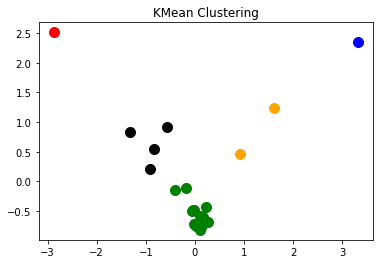

In [106]:
kmeanCluster()

###### agglomerative clustering.

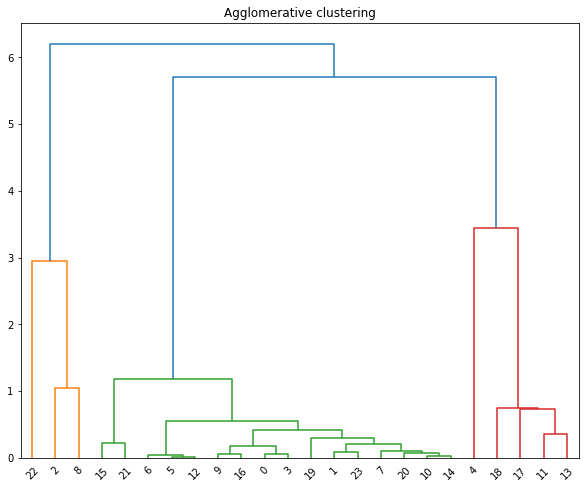

In [108]:
dendogram()